# Разведочный анализ данных

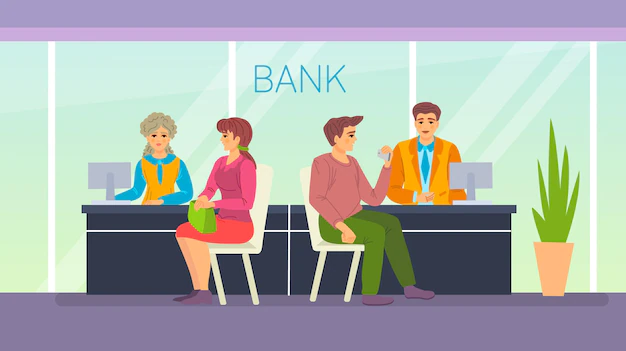

## Описание задачи

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.

Таблицы находятся [здесь](https://github.com/aiedu-courses/stepik_linear_models/tree/main/datasets).

## Импортирование библиотек и загрузка данных

Данные распределены по разным файлам. Для их анализа нужно поместить их в один датафрейм. Все файлы логически соединены столбцом либо через идентификатор клиента, либо через идентификатор кредита.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_job = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_job.csv")
df_last_credit = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_last_credit.csv")
df_salary = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_salary.csv")
df_target = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_target.csv")
df_clients = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_clients.csv")
df_loan = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_loan.csv")
df_close_loan = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_close_loan.csv")

## Обработка данных

Посмотрим на на наши данные.

In [ ]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GEN_INDUSTRY  13856 non-null  object 
 1   GEN_TITLE     13856 non-null  object 
 2   JOB_DIR       13856 non-null  object 
 3   WORK_TIME     13855 non-null  float64
 4   ID_CLIENT     15223 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 594.8+ KB


In [ ]:
df_last_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CREDIT       15223 non-null  float64
 1   TERM         15223 non-null  int64  
 2   FST_PAYMENT  15223 non-null  float64
 3   ID_CLIENT    15223 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 475.8 KB


In [ ]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FAMILY_INCOME    15523 non-null  object 
 1   PERSONAL_INCOME  15523 non-null  float64
 2   ID_CLIENT        15523 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 363.9+ KB


In [ ]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AGREEMENT_RK  15223 non-null  int64
 1   ID_CLIENT     15223 non-null  int64
 2   TARGET        15223 non-null  int64
dtypes: int64(3)
memory usage: 356.9 KB


In [ ]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       16000 non-null  int64 
 1   AGE                      16000 non-null  int64 
 2   GENDER                   16000 non-null  int64 
 3   EDUCATION                16000 non-null  object
 4   MARITAL_STATUS           16000 non-null  object
 5   CHILD_TOTAL              16000 non-null  int64 
 6   DEPENDANTS               16000 non-null  int64 
 7   SOCSTATUS_WORK_FL        16000 non-null  int64 
 8   SOCSTATUS_PENS_FL        16000 non-null  int64 
 9   REG_ADDRESS_PROVINCE     16000 non-null  object
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object
 11  POSTAL_ADDRESS_PROVINCE  16000 non-null  object
 12  FL_PRESENCE_FL           16000 non-null  int64 
 13  OWN_AUTO                 16000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

Видим, что самый "грязный" датасет - df_job, так как в нём много пропусков. В остальных их вообще нет.

In [ ]:
df_job.dropna(inplace=True)

In [ ]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13855 entries, 0 to 15222
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GEN_INDUSTRY  13855 non-null  object 
 1   GEN_TITLE     13855 non-null  object 
 2   JOB_DIR       13855 non-null  object 
 3   WORK_TIME     13855 non-null  float64
 4   ID_CLIENT     13855 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 649.5+ KB


Так же посмотрим на количество дубликатов. Удалим их при наличии.

In [ ]:
df_job.duplicated().sum(), df_last_credit.duplicated().sum(), df_salary.duplicated().sum(), df_target.duplicated().sum(), df_clients.duplicated().sum()

(0, 0, 300, 0, 0)

In [ ]:
df_salary.drop_duplicates(inplace=True)

В df_job сейчас меньше всего строк, поэтому будем прикреплять остальные таблички именно к ней. Для начала оставим записи только о тех клиентах, чьи id есть во всех таблицах.

In [ ]:
i = 0
while i <= df_salary.index.values[-1]:
    if (i in df_salary.index.values) and (df_salary["ID_CLIENT"][i] not in df_job["ID_CLIENT"].values): # считаем строго по индексам
        df_salary.drop(i, inplace=True)
    i += 1

i = 0
while i <= df_last_credit.index.values[-1]:
    if (i in df_last_credit.index.values) and (df_last_credit["ID_CLIENT"][i] not in df_job["ID_CLIENT"].values):
        df_last_credit.drop(i, inplace=True)
    i += 1


i = 0
while i <= df_target.index.values[-1]:
    if (i in df_target.index.values) and (df_target["ID_CLIENT"][i] not in df_job["ID_CLIENT"].values):
        df_target.drop(i, inplace=True)
    i += 1

i = 0
while i <= df_clients.index.values[-1]:
    if (i in df_clients.index.values) and (df_clients["ID"][i] not in df_job["ID_CLIENT"].values):
        df_clients.drop(i, inplace=True)
    i += 1

i = 0
while i <= df_loan.index.values[-1]:
    if (i in df_loan.index.values) and (df_loan["ID_CLIENT"][i] not in df_job["ID_CLIENT"].values):
        df_loan.drop(i, inplace=True)
    i += 1

In [ ]:
df_salary.shape, df_last_credit.shape, df_target.shape, df_clients.shape, df_loan.shape

((13855, 3), (13855, 4), (13855, 3), (13855, 14), (19359, 2))

Обработаем таблички про кредиты.

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19359 entries, 0 to 21125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID_LOAN    19359 non-null  int64
 1   ID_CLIENT  19359 non-null  int64
dtypes: int64(2)
memory usage: 969.8 KB


In [ ]:
df_close_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21126 entries, 0 to 21125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID_LOAN    21126 non-null  int64
 1   CLOSED_FL  21126 non-null  int64
dtypes: int64(2)
memory usage: 330.2 KB


In [ ]:
df_loan.duplicated().sum(), df_close_loan.duplicated().sum()

(0, 0)

Теперь ни в одной таблице нет ни пропусков, ни дубликатов. Отсортируем их по идентификатору клиента.

In [ ]:
df_salary.sort_values(by=["ID_CLIENT"], inplace=True)
df_job.sort_values(by=["ID_CLIENT"], inplace=True)
df_last_credit.sort_values(by=["ID_CLIENT"], inplace=True)
df_target.sort_values(by=["ID_CLIENT"], inplace=True)
df_clients.sort_values(by=["ID"], inplace=True)

Нужно посчитать общее количество ссуд и количество погашенных ссуд.

In [ ]:
agg_func = {"ID_LOAN" : ["nunique", list]}

df_grouped = df_loan.groupby(["ID_CLIENT"]).agg(agg_func)

In [ ]:
df_grouped.sort_index(inplace=True)

Для каждого клиента мы знаем общее количество взятых кредитов и их id. Создадим столбец для подсчёта закрытых кредитов. Пока все значения будут равны 0.

In [ ]:
values = [0] * 13855
df_grouped["LOAN_NUM_CLOSED"] = values
df_grouped

ID_LOAN                                       LOAN_NUM_CLOSED
          nunique                                  list                
ID_CLIENT                                                              
106804370       1                          [1753790658]               0
106804371       1                          [1753790659]               0
106804372       2              [1753790660, 1753790661]               0
106804373       1                          [1753790662]               0
106804374       2              [1753790663, 1753790664]               0
...           ...                                   ...             ...
106819587       1                          [1753811776]               0
106819588       3  [1753811777, 1753811778, 1753811779]               0
106819589       1                          [1753811780]               0
106819590       1                          [1753811781]               0
106819592       1                          [1753811783]               0

[13855 rows x 3 columns]

In [ ]:
df_grouped.columns = [col[1] for col in df_grouped.columns.values]

In [ ]:
df_grouped.rename(columns = {"nunique": "LOAN_NUM_TOTAL", "list": "LOANS", "": "LOAN_NUM_CLOSED"}, inplace=True) # переименуем названия столбцов

In [ ]:
df_grouped.reset_index(inplace=True, drop=True) # обновим индексы

In [ ]:
for i in range(len(df_grouped)): # проходимся по всем строкам новой таблицы с агрегированными признаками
    nums = 0 # количество закрытых кредитов
    for j in range(len(df_grouped.loc[i]["LOANS"])): # поочерёдно считываем идентификаторы взятых кредитов
        loan_num = df_grouped.loc[i]["LOANS"][j] # идентификатор взятого кредита
        index = np.where(df_close_loan["ID_LOAN"].values == loan_num)[0][0] # находим индекс по идентификатору в другой таблице
        val = df_close_loan.loc[index]["CLOSED_FL"] # вычисляем, закрыт ли данный кредит(1 - закрыт, 0 - нет)
        if val == 1:
            nums += 1
    df_grouped.at[i, "LOAN_NUM_CLOSED"] = nums # обновляем значение количества закрытых кредитов



In [ ]:
df_close_loan

,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1
...,...,...
21121,1753811779,1
21122,1753811780,0
21123,1753811781,0
21124,1753811782,0


In [ ]:
df_grouped

,LOAN_NUM_TOTAL,LOANS,LOAN_NUM_CLOSED
0,1,[1753790658],1
1,1,[1753790659],1
2,2,"[1753790660, 1753790661]",1
3,1,[1753790662],1
4,2,"[1753790663, 1753790664]",1
...,...,...,...
13850,1,[1753811776],0
13851,3,"[1753811777, 1753811778, 1753811779]",2
13852,1,[1753811780],0
13853,1,[1753811781],0


Выбросим повторяющиеся столбцы, чтобы не было коллизии названий. Унифицируем индексы для всех таблиц, чтобы они склеились без проблем.

In [ ]:
df_grouped.drop(["LOANS"], axis=1, inplace=True)
df_job.drop(["ID_CLIENT"], axis=1, inplace=True)
df_salary.drop(["ID_CLIENT"], axis=1, inplace=True)
df_last_credit.drop(["ID_CLIENT"], axis=1, inplace=True)
df_target.drop(["ID_CLIENT"], axis=1, inplace=True)
df_clients.drop(["ID"], axis=1, inplace=True)

In [ ]:
df_grouped.reset_index(inplace=True, drop=True)
df_job.reset_index(inplace=True, drop=True)
df_salary.reset_index(inplace=True, drop=True)
df_last_credit.reset_index(inplace=True, drop=True)
df_target.reset_index(inplace=True, drop=True)
df_clients.reset_index(inplace=True, drop=True)


In [ ]:
df = pd.concat([df_job, df_salary, df_last_credit, df_target, df_clients, df_grouped], axis=1)

In [ ]:
df

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,AGREEMENT_RK,...,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,от 10000 до 20000 руб.,5000.0,8000.00,6,8650.0,59910150,...,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,1,1
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,от 10000 до 20000 руб.,12000.0,21650.00,6,4000.0,59910230,...,3,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,1,1
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,от 10000 до 20000 руб.,9000.0,33126.00,12,4000.0,59910525,...,0,1,0,Иркутская область,Иркутская область,Иркутская область,0,0,2,1
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,от 20000 до 50000 руб.,25000.0,8491.82,6,5000.0,59910803,...,1,1,0,Ростовская область,Ростовская область,Ростовская область,1,0,1,1
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,от 10000 до 20000 руб.,12000.0,21990.00,12,4000.0,59911781,...,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13850,Металлургия/Промышленность/Машиностроение,Специалист,Участие в основ. деятельности,108.0,от 10000 до 20000 руб.,10000.0,22930.00,6,2550.0,75291338,...,1,1,0,Тамбовская область,Тамбовская область,Тамбовская область,0,0,1,0
13851,Строительство,Специалист,Участие в основ. деятельности,48.0,от 10000 до 20000 руб.,12000.0,13450.00,10,1500.0,75291424,...,1,1,0,Воронежская область,Воронежская область,Воронежская область,0,0,3,2
13852,Здравоохранение,Другое,Участие в основ. деятельности,156.0,от 20000 до 50000 руб.,10000.0,8991.00,6,4000.0,75291888,...,0,1,0,Башкирия,Башкирия,Башкирия,0,0,1,0
13853,Торговля,Служащий,Кадровая служба и секретариат,48.0,от 5000 до 10000 руб.,6000.0,2700.00,6,800.0,75291923,...,1,1,0,Брянская область,Брянская область,Брянская область,0,0,1,0


Готово!

Посмотрим на общую информацию по получившейся таблице.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855 entries, 0 to 13854
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GEN_INDUSTRY             13855 non-null  object 
 1   GEN_TITLE                13855 non-null  object 
 2   JOB_DIR                  13855 non-null  object 
 3   WORK_TIME                13855 non-null  float64
 4   FAMILY_INCOME            13855 non-null  object 
 5   PERSONAL_INCOME          13855 non-null  float64
 6   CREDIT                   13855 non-null  float64
 7   TERM                     13855 non-null  int64  
 8   FST_PAYMENT              13855 non-null  float64
 9   AGREEMENT_RK             13855 non-null  int64  
 10  TARGET                   13855 non-null  int64  
 11  AGE                      13855 non-null  int64  
 12  GENDER                   13855 non-null  int64  
 13  EDUCATION                13855 non-null  object 
 14  MARITAL_STATUS        

Видим, что у нас 9 не числовых признаков. Если в них окажется много категорий - избавимся от них.

In [ ]:
df["GEN_INDUSTRY"].nunique(), df["GEN_INDUSTRY"].unique()

(31,
 array(['Торговля', 'Информационные технологии', 'Образование',
        'Государственная служба', 'Другие сферы', 'Сельское хозяйство',
        'Здравоохранение', 'Металлургия/Промышленность/Машиностроение',
        'Коммунальное хоз-во/Дорожные службы', 'Строительство',
        'Транспорт', 'Банк/Финансы',
        'Ресторанный бизнес/Общественное питание', 'Страхование',
        'Нефтегазовая промышленность', 'СМИ/Реклама/PR-агенства',
        'Энергетика', 'Салоны красоты и здоровья', 'ЧОП/Детективная д-ть',
        'Развлечения/Искусство', 'Наука', 'Химия/Парфюмерия/Фармацевтика',
        'Сборочные производства', 'Туризм',
        'Юридические услуги/нотариальные услуги', 'Маркетинг',
        'Подбор персонала', 'Информационные услуги', 'Недвижимость',
        'Управляющая компания', 'Логистика'], dtype=object))

In [ ]:
df["GEN_TITLE"].nunique(), df["GEN_TITLE"].unique()

(12,
 array(['Рабочий', 'Специалист', 'Руководитель среднего звена',
        'Руководитель высшего звена', 'Служащий', 'Работник сферы услуг',
        'Высококвалифиц. специалист', 'Индивидуальный предприниматель',
        'Военнослужащий по контракту', 'Руководитель низшего звена',
        'Другое', 'Партнер'], dtype=object))

In [ ]:
df["JOB_DIR"].nunique(), df["JOB_DIR"].unique()

(10,
 array(['Вспомогательный техперсонал', 'Участие в основ. деятельности',
        'Адм-хоз. и трансп. службы', 'Пр-техн. обесп. и телеком.',
        'Служба безопасности', 'Бухгалтерия, финансы, планир.',
        'Снабжение и сбыт', 'Кадровая служба и секретариат',
        'Юридическая служба', 'Реклама и маркетинг'], dtype=object))

In [ ]:
df["FAMILY_INCOME"].nunique(), df["FAMILY_INCOME"].unique()

(5,
 array(['от 10000 до 20000 руб.', 'от 20000 до 50000 руб.',
        'свыше 50000 руб.', 'от 5000 до 10000 руб.', 'до 5000 руб.'],
       dtype=object))

In [ ]:
df["EDUCATION"].nunique(), df["EDUCATION"].unique()

(7,
 array(['Среднее специальное', 'Среднее', 'Неполное среднее', 'Высшее',
        'Неоконченное высшее', 'Два и более высших образования',
        'Ученая степень'], dtype=object))

In [ ]:
df["MARITAL_STATUS"].nunique(), df["MARITAL_STATUS"].unique()

(5,
 array(['Состою в браке', 'Гражданский брак', 'Разведен(а)',
        'Не состоял в браке', 'Вдовец/Вдова'], dtype=object))

Оставим только образование, доход и семейное положение.

In [ ]:
df.drop(["GEN_INDUSTRY", "GEN_TITLE", "JOB_DIR", "REG_ADDRESS_PROVINCE", "FACT_ADDRESS_PROVINCE", "POSTAL_ADDRESS_PROVINCE"], axis=1, inplace=True)

In [ ]:
df

,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,AGREEMENT_RK,TARGET,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,18.0,от 10000 до 20000 руб.,5000.0,8000.00,6,8650.0,59910150,0,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,1,1
1,97.0,от 10000 до 20000 руб.,12000.0,21650.00,6,4000.0,59910230,0,32,1,Среднее,Состою в браке,3,3,1,0,0,0,1,1
2,84.0,от 10000 до 20000 руб.,9000.0,33126.00,12,4000.0,59910525,0,52,1,Неполное среднее,Состою в браке,4,0,1,0,0,0,2,1
3,168.0,от 20000 до 50000 руб.,25000.0,8491.82,6,5000.0,59910803,0,39,1,Высшее,Состою в браке,1,1,1,0,1,0,1,1
4,101.0,от 10000 до 20000 руб.,12000.0,21990.00,12,4000.0,59911781,0,30,0,Среднее,Состою в браке,0,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13850,108.0,от 10000 до 20000 руб.,10000.0,22930.00,6,2550.0,75291338,0,39,1,Среднее специальное,Состою в браке,1,1,1,0,0,0,1,0
13851,48.0,от 10000 до 20000 руб.,12000.0,13450.00,10,1500.0,75291424,0,25,0,Среднее,Состою в браке,1,1,1,0,0,0,3,2
13852,156.0,от 20000 до 50000 руб.,10000.0,8991.00,6,4000.0,75291888,0,51,1,Среднее специальное,Состою в браке,2,0,1,0,0,0,1,0
13853,48.0,от 5000 до 10000 руб.,6000.0,2700.00,6,800.0,75291923,0,22,1,Среднее,Не состоял в браке,1,1,1,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855 entries, 0 to 13854
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WORK_TIME          13855 non-null  float64
 1   FAMILY_INCOME      13855 non-null  object 
 2   PERSONAL_INCOME    13855 non-null  float64
 3   CREDIT             13855 non-null  float64
 4   TERM               13855 non-null  int64  
 5   FST_PAYMENT        13855 non-null  float64
 6   AGREEMENT_RK       13855 non-null  int64  
 7   TARGET             13855 non-null  int64  
 8   AGE                13855 non-null  int64  
 9   GENDER             13855 non-null  int64  
 10  EDUCATION          13855 non-null  object 
 11  MARITAL_STATUS     13855 non-null  object 
 12  CHILD_TOTAL        13855 non-null  int64  
 13  DEPENDANTS         13855 non-null  int64  
 14  SOCSTATUS_WORK_FL  13855 non-null  int64  
 15  SOCSTATUS_PENS_FL  13855 non-null  int64  
 16  FL_PRESENCE_FL     138

Сохраним "чистый" датасет.

In [ ]:
df.to_csv("clients_clean.csv", index=False)

## Описание данных

- WORK_TIME — время работы на текущем месте (в месяцах);
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях);
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях);
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности;
- LOAN_NUM_TOTAL — количество ссуд клиента;
- LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

## Исследование данных

Посмотрим на распределение числовых признаков.

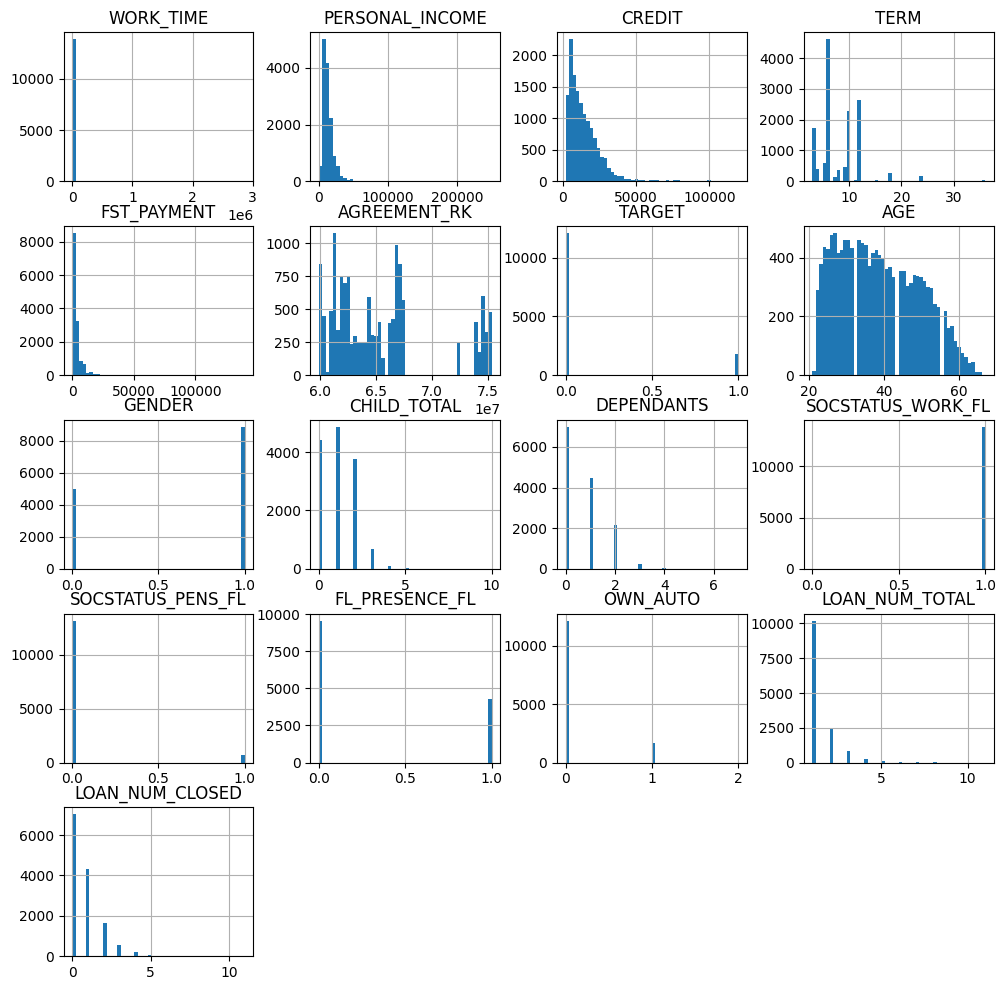

In [ ]:
df.hist(bins=50, figsize=(12,12))

plt.show()

Видим, что много дискретно распределенных признаков. Нормального распределения нет нигде.
Около половины всех взятых кредитов не закрыты. Более, чем у 10,000 людей нет в собственности машины. Примерно у 10,000 нет и квартиры. Соотношение мужчин и женщин примерно 2:1.
Посмотрим на корреляции.

<ipython-input-44-d28e481d6410>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() # correlation matrix


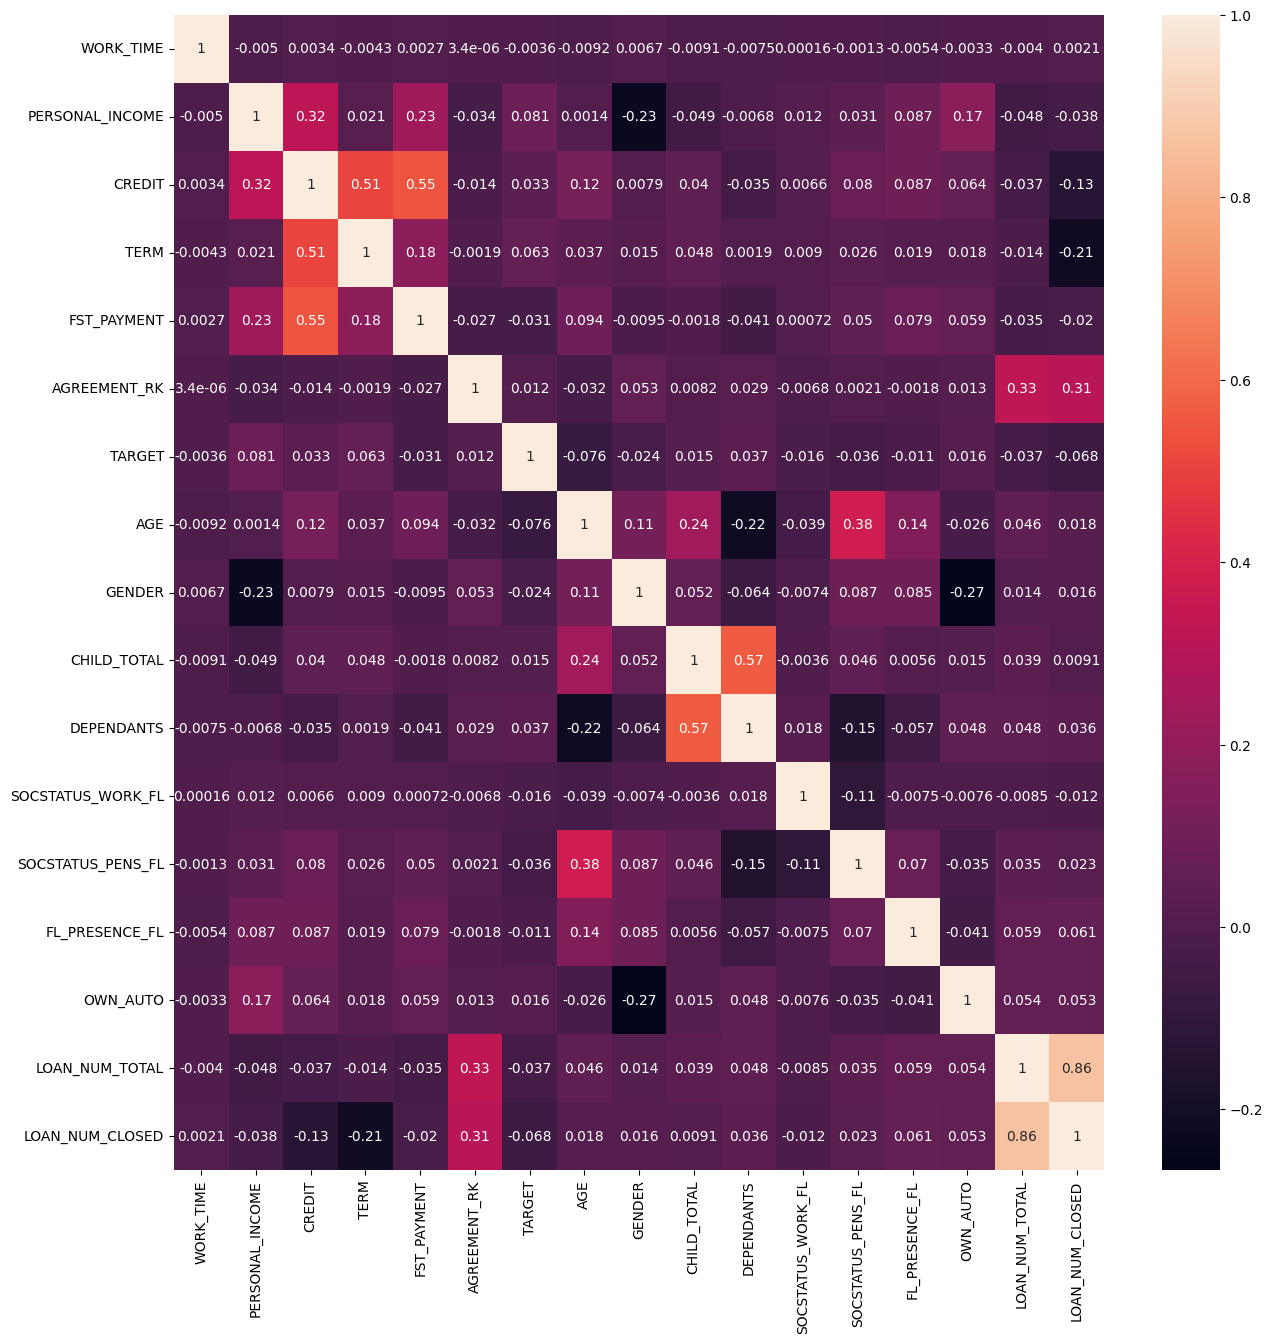

In [ ]:
corr = df.corr() # correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

Наблюдаем очень сильную взаимосвязь между количеством взятых кредитов и количеством закрытых кредитов. Также высокая корреляция между суммой последнего кредита с первоначальным взносом и его сроком.

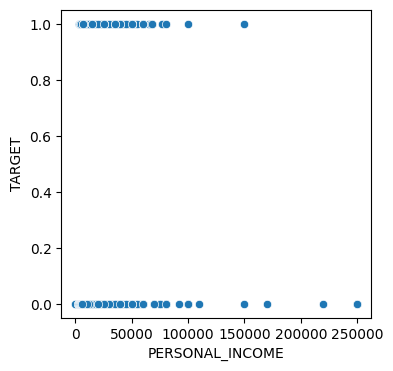

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=df.PERSONAL_INCOME, y=df.TARGET)
plt.show()

Видим, что на маркетинговое предложение не откликались люди с доходом больше 150,000.

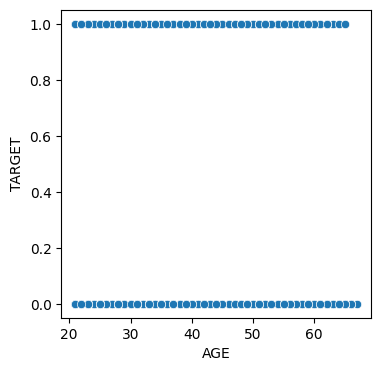

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=df.AGE, y=df.TARGET)
plt.show()

Видим, что самые старые клиенты банка(возрастом более 65 лет) не были заинтересованы в предложениях банка.

Посмотрим на числовые характеристики распределения числовых столбцов.

In [ ]:
df.describe()

,WORK_TIME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,AGREEMENT_RK,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
count,1.385500e+04,13855.000000,13855.000000,13855.000000,13855.000000,1.385500e+04,13855.000000,13855.000000,13855.000000,13855.000000,13855.000000,13855.00000,13855.000000,13855.000000,13855.000000,13855.000000,13855.000000
mean,2.922120e+02,14413.438987,14934.855620,8.144497,3474.026995,6.536427e+07,0.127174,38.760159,0.639336,1.086611,0.696355,0.99935,0.049080,0.308986,0.123782,1.397257,0.765500
std,2.436483e+04,9079.514431,12481.687733,4.175802,5302.460916,4.525424e+06,0.333180,10.657970,0.480211,0.956619,0.822291,0.02548,0.216042,0.462092,0.329564,0.805437,1.000545
min,1.000000e+00,24.000000,2000.000000,3.000000,0.000000,5.991015e+07,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.400000e+01,9000.000000,6526.000000,6.000000,1000.000000,6.192094e+07,0.000000,30.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.800000e+01,12000.000000,11720.000000,6.000000,2000.000000,6.437103e+07,0.000000,38.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.100000e+02,17000.000000,19590.000000,10.000000,4000.000000,6.707961e+07,0.000000,47.000000,1.000000,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
max,2.867959e+06,250000.000000,119700.000000,36.000000,140000.000000,7.529224e+07,1.000000,67.000000,1.000000,10.000000,7.000000,1.00000,1.000000,1.000000,2.000000,11.000000,11.000000


Интересно, что:
- средний заработок примерно равен среднему значению взятого кредита
- был человек(несколько людей) с 11 кредитами
- огромная разница между минимальным и максимальным заработком(минимальный - 24, максимальный - 250,000)

Рассмотрим столбцы с категориальными признаками. Посчитаем количество уникальных значений в них.

In [ ]:
df.EDUCATION.unique(), len(df.EDUCATION.unique())

(array(['Среднее специальное', 'Среднее', 'Неполное среднее', 'Высшее',
        'Неоконченное высшее', 'Два и более высших образования',
        'Ученая степень'], dtype=object),
 7)

In [ ]:
df.FAMILY_INCOME.unique(), len(df.FAMILY_INCOME.unique())

(array(['от 10000 до 20000 руб.', 'от 20000 до 50000 руб.',
        'свыше 50000 руб.', 'от 5000 до 10000 руб.', 'до 5000 руб.'],
       dtype=object),
 5)

In [ ]:
df.MARITAL_STATUS.unique(), len(df.MARITAL_STATUS.unique())

(array(['Состою в браке', 'Гражданский брак', 'Разведен(а)',
        'Не состоял в браке', 'Вдовец/Вдова'], dtype=object),
 5)

In [ ]:
print("Данные по образованию")
for i in range(df.EDUCATION.nunique()):
    el = df.EDUCATION.unique()[i]
    print(f"{el}: {df.EDUCATION.value_counts()[el]}")

print("\n\n\nДанные по доходу семьи")
for i in range(df.FAMILY_INCOME.nunique()):
    el = df.FAMILY_INCOME.unique()[i]
    print(f"{el}: {df.FAMILY_INCOME.value_counts()[el]}")

print("\n\n\nДанные по семейному положению")
for i in range(df.MARITAL_STATUS.nunique()):
    el = df.MARITAL_STATUS.unique()[i]
    print(f"{el}: {df.MARITAL_STATUS.value_counts()[el]}")

Данные по образованию
Среднее специальное: 5939
Среднее: 4115
Неполное среднее: 233
Высшее: 3020
Неоконченное высшее: 528
Два и более высших образования: 19
Ученая степень: 1



Данные по доходу семьи
от 10000 до 20000 руб.: 6339
от 20000 до 50000 руб.: 5882
свыше 50000 руб.: 486
от 5000 до 10000 руб.: 1121
до 5000 руб.: 27



Данные по семейному положению
Состою в браке: 8626
Гражданский брак: 333
Разведен(а): 1155
Не состоял в браке: 3338
Вдовец/Вдова: 403
